# Преамбула
Экзамен состоит из трёх блоков:  
- программирование на python;  
- работа с датафреймами и описательная статистика;  
- классическое машинное обучение.

Стоимость вопроса равна одному баллу, если не сказано иное.  
Для успешной сдачи экзамена необходимо набрать 50% и более от максимального числа баллов.

- **NB:** В первом блоке (программирование на python) **ЗАПРЕЩЕНО** пользоваться библиотеками, не посталяемыми вместе с python по-умолчанию (т.е. pandas/numpy нельзя использовать в это блоке, а random/json -- можно);
- Во всех задачах на визуализацию **подписи, названия и легенду делать необязательно!**
- Все спорные моменты трактуются в пользу экзаменуемого;  
- Ваш код должен быть воспроизводим (если я положу исходные файлы в ту же папку, что и Ваш ноутбук, и нажму `Run` -> `Run All Cells`, то всё должно работать). Так что соблюдайте логику и последовательнось запуска ячеек. Спасибо :)  
- Можно пользоваться только своей головой, но любыми материалами и интернетом;  
- Если задание кажется сложным -- пропустите его;  

- Во время экзамена я буду отвечать только на вопросы касаемо формулировок заданий.

Главное, не спешите, проверяйте, что и куда записывается.  
За каждого болею.  
Всем удачи!  


<left>
    <img src="Data/pics/goodluck.gif"/>
</left>

## A. Базовый python
Для решения задач блока запрещено пользоваться библиотеками, не поставляемые вместе с python.  
Иными словами, всё, что устанавливается через `pip`, тут использовать нельзя.

### 1. 
Напишите функцию `MApred`, которая принимает в качестве аргументов список из float-чисел с информацией о том, сколько газа было прокачано через некоторый пункт (в кубометрах).  

В списке может быть любое количество чисел от 7 и до плюс бесконечности.

Функция должна возвращать предсказание о том, сколько газа будет прокачано завтра. 

**Реализуйте наивный предсказатель, который в качестве предсказания просто возвращает среднее за последние 7 дней.**


In [1]:
def MApred(flow):
    return sum(flow[-7:]) / 7

In [2]:
assert MApred([10] * 10) == 10

In [3]:
assert MApred(list(range(100, 200, 7))) == 177

In [4]:
assert MApred([30.97, 33.3 , 35.63, 
               37.96, 40.29, 42.62, 
               44.95, 47.28, 49.61]) == 42.62

### 2. (3 балла)
Реализуйте функцию `MApredK`, которая в качестве аргумента также принимает горизонт прогноза (т.е. на сколько дней вперёд необходимо сделать прогноз). 

Также реализуем наивный предиктор.  
Для предсказания на завтра (k+1 день) используем среднее за последние 7 дней.  
Для предсказания на послезавтра используем среднее за последние 6 дней и предсказание завтра (для k+2 дня это просто среднее за посление 7 дней). 

Таким образом, для каждого последующего предсказания мы опираемся на всё большее число уже сделанных предсказаний.

Функция должна возвращать **новый** список из исходных значений и предсказаний.

In [5]:
def MApredK(flow, k):
    predictions = flow.copy()
    for _ in range(k):
        predictions.append(sum(predictions[-7:]) / 7)
    return predictions

In [6]:
assert MApredK([30.97, 33.3 , 35.63, 
               37.96, 40.29, 42.62, 
               44.95, 47.28, 49.61], 1)[-1] == 42.62

In [7]:
assert MApredK([30.97, 33.3 , 35.63, 
         37.96, 40.29, 42.62, 
         44.95, 47.28, 49.61], 3)[-1] ==  44.42693877551021

### 3. (3 балла)
Даны 3 файла (`flow1.txt`,`flow2.txt`,`flow3.txt`) с исторической информацией о прокачке газа через некоторые пункты. Название пункта записано на первой строке в файле. Число строк в файлах одинаково.

Создайте результирующий файл `flow_total.csv` с четырьмя столбцами:
* Tarvisio (число прокачки из первого файла, округлённое до десятых);
* Mazara (число прокачки из второго файла, округлённое до десятых);
* PassoGries (число прокачки из третьего файла, округлённое до десятых);
* MaxFlowGate (название пункта, в котором была максимальная прокачка в этот день).

Разделитель точка с запятой. Кодировка utf-8.

Примерный результат (первые 10 строк):<br>
<img src='Data/pics/task3.png' align='left'/>

In [8]:
with open('Data/flow1.txt', 'r', encoding='utf8') as file1:
    with open('Data/flow2.txt', 'r', encoding='utf8') as file2:
        with open('Data/flow3.txt', 'r', encoding='utf8') as file3:
            with open('Data/flow_total.csv', 'w', encoding='utf8') as out:
                
                file1.readline()
                file2.readline()
                file3.readline()
                
                out.write('Tarvisio;Mazara;PassoGries;MaxFlowGate\n')
                
                for line1, line2, line3 in zip(file1, file2, file3):
                    num1, num2, num3 = float(line1), float(line2), float(line3)
                    if num1 >= num2 and num1 >= num3:
                        leader = 'Tarvisio'
                    elif num2 >= num1 and num2 >= num3:
                        leader = 'Mazara'
                    elif num3 >= num1 and num3 >= num2:
                        leader = 'PassoGries'
                    out.write("{:.1f};{:.1f};{:.1f};{}\n".format(num1, num2, num3, leader))


### 4.

Описание классовой структуры

Есть Помидор со следующими характеристиками:

    Индекс
    Стадия зрелости(стадии: Отсутствует, Цветение, Зеленый, Красный)

Помидор может:

    Расти (переходить на следующую стадию созревания)
    Предоставлять информацию о своей зрелости

Есть Куст с помидорами, который:

    Содержит список томатов, которые на нем растут

И может:

    Расти вместе с томатами
    Предоставлять информацию о зрелости всех томатов
    Предоставлять урожай

#### 4.1 (3 балла)

Класс Tomato

Создайте класс Tomato  
* Создайте <a href='https://metanit.com/python/tutorial/7.6.php'>статический атрибут</a> states, который будет содержать все стадии созревания помидора (список);  
* Создайте метод \_\_init\_\_(), внутри которого происходит созадние двух атрибутов: index (номер индекса текущего состояния из списка states), state (принимает первое значение из массива состояний зрелости states);  
* Создайте метод grow(), который будет переводить томат на следующую стадию созревания. Если томат созрел, то стадия не повышается;  
* Создайте метод is_ripe(), который будет проверять, что томат созрел (достиг последней стадии созревания).  


PS. Пример со стат.атрибутом:  

```
class Dog:
    default_name = 'Бобик' # создание статического атрибута
    
    def __init__(self, name='NONAME'):
        if name == 'NONAME':
            self.name = Dog.default_name # использование статического атрибута
        else:
            self.name = name
```

In [9]:
class Tomato:
    
    states = ['Отсутствует', 'Цветение', 'Зеленый', 'Красный']
    
    def __init__(self):
        self.index = 0
        self.state = Tomato.states[self.index]
        
    def is_ripe(self):
        return self.state == Tomato.states[-1]
    
    def grow(self):
        if not self.is_ripe():
            self.index += 1
            self.state = Tomato.states[self.index]

In [10]:
t = Tomato()
assert all([t.index == 0, t.state == 'Отсутствует', not t.is_ripe()])
print(t.index, t.state, t.is_ripe())

t.grow()
t.grow()
t.grow()

assert all([t.index == 3, t.state == 'Красный', t.is_ripe()])
print(t.index, t.state, t.is_ripe())

t.grow()
t.grow()
t.grow()

assert all([t.index == 3, t.state == 'Красный', t.is_ripe()])
print(t.index, t.state, t.is_ripe())

0 Отсутствует False
3 Красный True
3 Красный True


#### 4.2 (3 балла)

Класс TomatoBush

Создайте класс TomatoBush  
* Определите метод \_\_init\_\_(), который будет принимать в качестве параметра количество томатов и на его основе будет создавать список объектов класса Tomato. Данный список будет храниться внутри атрибута tomatoes;
* Создайте метод grow_all(), который будет переводить все объекты из списка томатов на следующий этап созревания;  
* Создайте метод all_are_ripe(), который будет возвращать True, если все томаты из списка стали спелыми;  
* Создайте метод give_away_all(), который будет чистить список томатов после сбора урожая.  

In [11]:
class TomatoBush:
    
    def __init__(self, k):
        self.tomatoes = [Tomato() for _ in range(k)]
        
    def grow_all(self):
        for t in self.tomatoes:
            t.grow()
            
    def all_are_ripe(self):
        return all([t.is_ripe() for t in self.tomatoes])
    
    def give_away_all(self):
        self.tomatoes = []

In [12]:
tb = TomatoBush(3)

assert len(tb.tomatoes) == 3
assert not tb.all_are_ripe()

tb.grow_all()
assert not tb.all_are_ripe()

tb.grow_all()
assert not tb.all_are_ripe()

tb.grow_all()
assert tb.all_are_ripe()
tb.give_away_all()

assert len(tb.tomatoes) == 0

# B. Работа с табличными данными

В этом блоке мы поработает с данными о студентах и их результатами на экзаменах.

In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 5.
Информация о студентах содержится в файлах с названием `Students_info_i.csv`, где `i` принимает значения от 0 до 9. Результаты экзаменов лежат в файлах с маской  названия`Students_marks_i.csv`.  
Вся информация находится в папке `Data`.

В обоих файлах есть колонка `index` -- номер студента.

> \* *Файлы также находятся в папке `pandas_prep_task` Укажем относительный путь до этой папки, чтобы не дублировать файлы в репозитории.*. 

#### 5.1 (1.5 балла)
Соедините файлы с информацией о студентах в один датафрейм.  
Соедините файлы с оценками студентов в один датафрейм (другой).

In [14]:
info = pd.concat([pd.read_csv(f'../../pandas_prep_task/Data/Students_info_{i}.csv', sep=',') for i in range(10)])
print(info.shape)
info.head()

(1000, 7)


,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group
0,0,female,group B,bachelor's degree,standard,none,group1
1,1,female,group C,some college,standard,completed,group1
2,2,female,group B,master's degree,standard,none,group1
3,3,male,group A,associate's degree,free/reduced,none,group1
4,4,male,group C,some college,standard,none,group1


In [15]:
marks = pd.concat([pd.read_csv(f'../../pandas_prep_task/Data/Students_marks_{i}.csv', sep=',') for i in range(10)])
print(marks.shape)
marks.head()

(1000, 4)


,index,math score,reading score,writing score
0,0,72,72,74
1,1,69,90,88
2,2,90,95,93
3,3,47,57,44
4,4,76,78,75


#### 5.2 (0.5 балла)
Соедините два датафрейма в один соответсвующим образом (т.е. после информации о студенте должны идти его/её оценки).  

*Добавьте проверку, что для каждого студента оценки были найдены единожды (+0.25 балла)*

In [16]:
df = pd.merge(info, marks, on='index', how='outer', validate='1:1')
print(df.shape)
df.head(3)

(1000, 10)


,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,1,female,group C,some college,standard,completed,group1,69,90,88
2,2,female,group B,master's degree,standard,none,group1,90,95,93


In [17]:
# для дальнейшей работы.
# df.to_csv('Data/final_table_data.csv', sep=',', index_label=False, index=False)

### 6. 
Проверьте, есть ли в таблице пропущенные значения.  
Если они есть -- удалите строки с пропусками.

**NB:** если не получилось справиться, то используйте готовую соединённую таблицу. Она находится в файле `final_table_data.csv` в папке `Data`. Разделитель запятая.

In [18]:
df.isna().sum().sum()

0

In [19]:
# пропусков нет! удалять нечего
# df = df.dropan() # иначе бы воспользвались 

### 7.
Выведите средние оценки по всем предметам за одну команду.

In [20]:
df[['math score', 'reading score', 'writing score']].mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### 8.
У нас есть информация о том, проходил ли студент подготовительные курсы (столбец `test preparation course`).

#### 8.1
Посчитайте, сколько студентов завершили подготовительные курсы.  
Дайте ответ в долях единицы. Ответ округлите до сотых.

In [21]:
df['test preparation course'].value_counts(normalize=True).round(2)

test preparation course
none         0.64
completed    0.36
Name: proportion, dtype: float64

### 8.2
На частотной гистограмме (барчарт) изобразите, сколько студентов училось и сколько не училось на подготовительных курсах.

Примерный результат:<br>
<img src='Data/pics/task82.png' align='left'/>

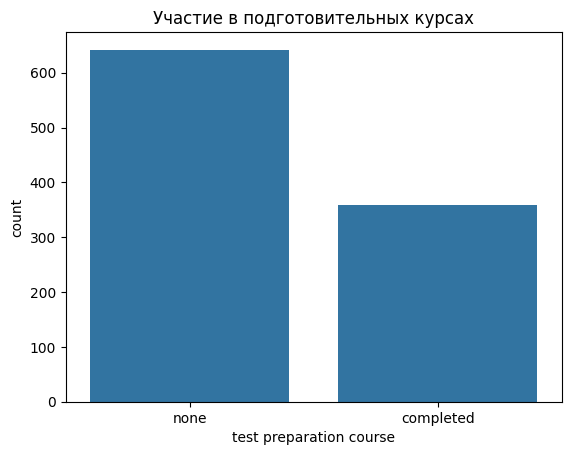

In [22]:
sns.countplot(data=df, x='test preparation course')
plt.title('Участие в подготовительных курсах')
plt.show()

### 8.3 (0.5 балла)
Сделайте то же, что и в предыдущей задаче, но добавьте разделение по полу

Примерный результат:<br>
<img src='Data/pics/task83.png' align='left'/>

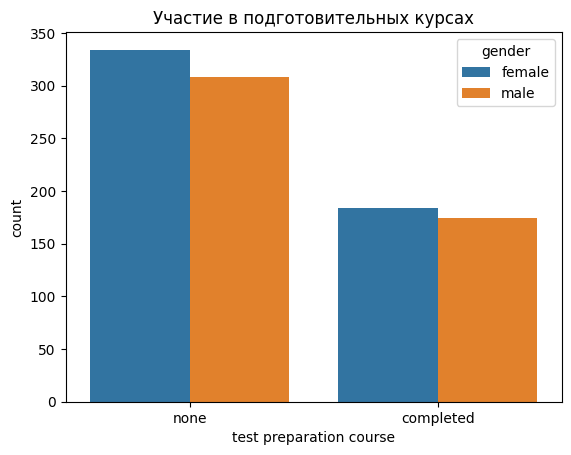

In [23]:
sns.countplot(data=df, x='test preparation course', hue='gender')
plt.title('Участие в подготовительных курсах')
plt.show()

### 9. (2 балла)
Слава богу, что здесь расы и этнические принадлежности анонимизированы. А то определили бы сейчас, что одни самые умные, а дргуие -- нет.   
Ещё бы за разжигание меня оформили :D

Для каждой группы по `race/ethnicity` определите среднее значение, минимум, максимум иинтерквартильный размах оценки по математике (по 0.5 балла за каждую статистику).  

Примерный результат:<br>
<img src='Data/pics/task91.png' align='left'/>

In [24]:
df.groupby('race/ethnicity')['math score'].agg(mean='mean',
                                               min='min', 
                                               max='max', 
                                               IQR= lambda x: x.quantile(0.75) - x.quantile(0.25))

,mean,min,max,IQR
race/ethnicity,,,,
group A,61.629213,28,100,20.00
group B,63.452632,8,97,20.00
group C,64.463950,0,98,19.00
group D,67.362595,26,100,18.00
group E,73.821429,30,100,20.25


### 10.
Для прохождения экзамена необходимо было набрать минимум 50 баллов.  

Для каждого из экзамена посчитайте процент сдавших (+0.5 балла, если сделаете за одну команду).

In [25]:
(df.iloc[:, -3:] >= 50).mean()

math score       0.865
reading score    0.910
writing score    0.886
dtype: float64

### 11.
Переведите данные в длинный (long) формат. Должна быть сохранена следующая информация:  
* parental level of education
* предмет;
* балл.

Примерный результат:<br>
<img src='Data/pics/task11.png' align='left'/>


In [26]:
dflong = df.melt(id_vars='parental level of education',
                 value_vars = ['math score', 'reading score', 'writing score'])
dflong

,parental level of education,variable,value
0,bachelor's degree,math score,72
1,some college,math score,69
2,master's degree,math score,90
3,associate's degree,math score,47
4,some college,math score,76
...,...,...,...
2995,master's degree,writing score,95
2996,high school,writing score,55
2997,high school,writing score,65
2998,some college,writing score,77


### 12.
Визуализируйте плотность распределения оценок по каждому экзамену на одной картинке.  
*Мы хотим три независимых распределения, так что, возможно, нужно указать, что нормировать надо отдельно.

Примерный результат:<br>
<img src='Data/pics/task12.png' align='left'/>

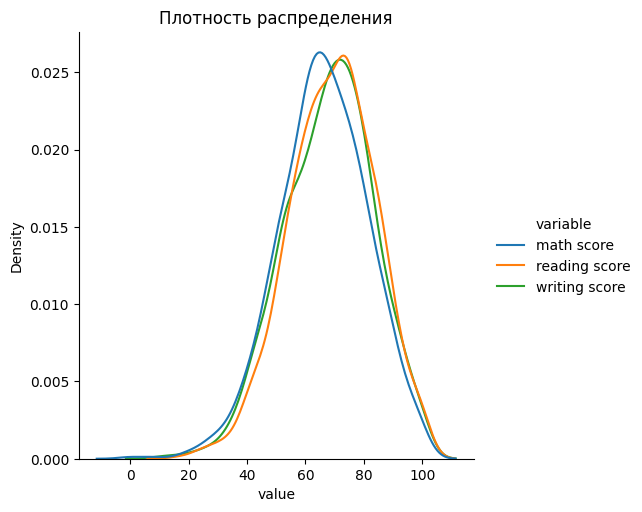

In [27]:
sns.displot(data=dflong, x='value', hue='variable', kind='kde', common_norm=False)
plt.title('Плотность распределения')
plt.show()

### 13. 
Необходимо определить оценки за экзамен.

#### 13.1
Напишите функцию `get_grade`, которая принимает число и возвращает оценку. 

Система перевода баллов в оценку:  
> [90;100] = A  
      [80;90) = B  
      [70;80) = C  
      [60;70) = D  
      [50;60) = E  
      [0;50) = F  
      
*\*(квадратная скобка -- включительно, круглая -- не включая)*

In [28]:
def get_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    elif score >= 50:
        return 'E'
    else:
        return 'F'

#### 13.2
С использование функции `get_grade` создайте новый столбец `reading mark` с оценками за экзамен по чтению.

In [29]:
df['reading mark'] = df['reading score'].apply(get_grade)

#### 13.3
Визуализируйте частоту оценок за экзамен по чтению. Упорядочите оценки.

Примерный результат:<br>
<img src='Data/pics/task133.png' align='left'/>

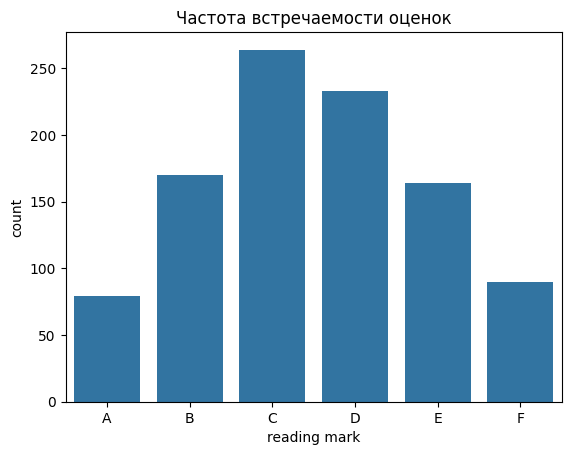

In [30]:
sns.countplot(data=df.sort_values(by='reading mark'), x='reading mark')
plt.title('Частота встречаемости оценок')
plt.show()

In [31]:
df.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score,reading mark
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74,C
1,1,female,group C,some college,standard,completed,group1,69,90,88,A
2,2,female,group B,master's degree,standard,none,group1,90,95,93,A
3,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,E
4,4,male,group C,some college,standard,none,group1,76,78,75,C


## C. Классическое машинное обучение
В этой части мы продолжим работать с предыдущим датасетом.  
Можете прочитать его заново из файла `final_table_data.csv`.

In [32]:
dfML = pd.read_csv('Data/final_table_data.csv', sep=',', encoding='utf8')

### 14.
Попробуем тоько по категориальным данным определить результат экзамен по математике.



#### 14.1 (5 баллов)
* Оставьте только категориальные столбцы (собрал их в список для удобства); 
* Закодируйте категории с помощью one-hot encoding (не забудьте про мультиколлинеарность. не допустите её здесь);
* Разделите данные на трейн и тест. В качестве целевой переменной используйте score экзамена по математике.  
25% данных в трейн. seed для воспроизводимсоит 16072023. 
* Обучите модель линейной регрессии без регуляризации с параметрами по-умолчанию для предсказания скора по математике;
* Посчитайте средний модуль ошибки на тестовых данных;
* Посчитайте коэффициент детерминации.

**На сколько процентов метрика меньше, чем стандартное отклонение скора в тренинговой выборке?**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [34]:
cat_cols = ['gender', 'race/ethnicity', 'parental level of education','lunch', 'test preparation course', 'group']

In [35]:
X = dfML[cat_cols]
y = dfML['math score']

In [36]:
X = pd.get_dummies(X, drop_first=True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16072023)

In [38]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

10.943503343370505

In [39]:
r2_score(y_test, y_pred)

0.15629353190605944

In [40]:
round(1 - mean_absolute_error(y_test, y_pred) / y_train.std(), 3)

0.281

#### 14.2 (2 балла)
* Нарисуйте диаграмму рассеяния истинных значений скора по математике и предсказанных (по иксу -- реальное, по игреку -- предсказанное);
* Добавьте уравнение прямой (прямую линию) $ y = x$;
* Добавьте на график значение MAE и $R^2$.

Примерный результат:<br>
<img src='Data/pics/task14.png' align='left'/>

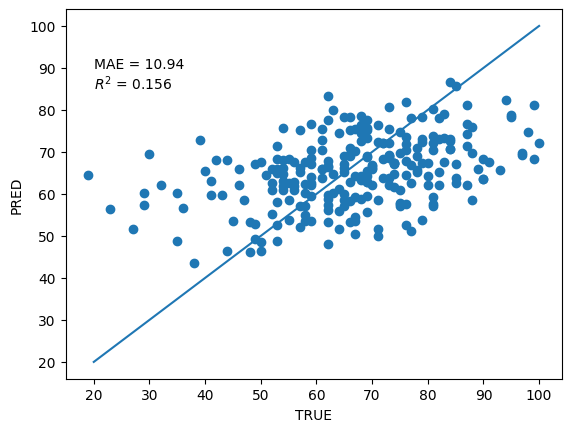

In [41]:
plt.scatter(y_test, y_pred)
plt.plot([20, 100], [20, 100])
plt.xlabel('TRUE')
plt.ylabel('PRED')
plt.text(20, 90, f"MAE = {mean_absolute_error(y_test, y_pred):.2f}")
plt.text(20, 85, f"$R^2$ = {r2_score(y_test, y_pred):.3f}")
plt.show()

### 15. (4 балла)
Это стоило сделать ДО обучения модели, но кто ж нам запретит сделать это сейчас.  
Давайте убедимся, что по категориальным признакам с помощью one-hot encoding тяжело получить хорошую модель.

Работу ведите всех матрице признков и векторе с целевой переменной (на том, что получили после кодирования категорий).

* Методом главный компонент получите координаты точек в первых двух главных компонентах;
* Нарисуйте диаграмму рассения в координатах первых двух главных компонент;
* Раскрасьте точки по значению целевой переменной (передайте в параметр `c` вектор с целевой переменной);
* Добавьте colorbar (метод colorbar);
* **Скажите своими словами, как можно объяснить то, что мы видим? Какие выводы из полученной картинки можно сделать о данных?**

Примерный результат:<br>
<img src='Data/pics/task15.png' align='left'/>
<br>



In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)
Xpca

array([[-0.01799367,  0.42623992],
       [ 0.83175811,  0.19210805],
       [-0.05698269,  0.46494637],
       ...,
       [ 0.92152162,  0.22945071],
       [-0.5060626 ,  0.59521372],
       [-0.57816583,  1.01463329]])

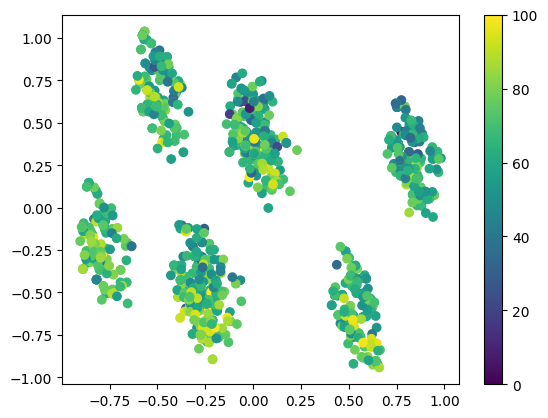

In [44]:
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y)
plt.colorbar()
plt.show()

<left>
    <img src="Data/pics/ck.gif"/>
</left>